## Prepare

In [80]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from imblearn.over_sampling import SVMSMOTE

In [81]:
#Data
print(os.getcwd())
data_dir = os.getcwd() + "\\Data set\\Parkinson disease.csv"
print(data_dir)

F:\Parkinson-Disease
F:\Parkinson-Disease\Data set\Parkinson disease.csv


In [82]:
df_parkinson = pd.read_csv(data_dir, delimiter = ",")
df_parkinson.info()
df_parkinson.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [83]:
#dropna drops missing values
df_parkinson_miss = df_parkinson.dropna(axis=0)
print(df_parkinson_miss)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:P

## Data processing

In [84]:
ef=['name','HNR','RPDE','DFA','D2', "spread2"]
df_parkinson_ef= df_parkinson.drop(ef, 1, errors='ignore')
df_parkinson_ef.describe()

C:\Users\HANGO\AppData\Local\Temp\ipykernel_2904\745814282.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_parkinson_ef= df_parkinson.drop(ef, 1, errors='ignore')


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,status,spread1,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,0.753846,-5.684397,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,0.431878,1.090208,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,0.000000,-7.964984,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,1.000000,-6.450096,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,1.000000,-5.720868,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,1.000000,-5.046192,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,1.000000,-2.434031,0.527367


In [85]:
df_parkinson_ef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  status            195 non-null    int64  
 16  spread1           195 non-null    float64
 1

## Split data

In [86]:
X=(df_parkinson_ef.iloc[:,0:]).drop(columns=["status"])
y = df_parkinson_ef.status
print(X.shape,y.shape)
#X.info()

(195, 17) (195,)


In [87]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [88]:
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print(len(y_train))
print('')
print('y_test : ')
print(y_test.head())
print(len(y_test))

X_train : 
     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
149      202.632       565.740       177.258         0.01627   
180      150.440       163.441       144.736         0.00396   
54       108.807       134.656       102.874         0.00761   
159      127.930       138.752       112.173         0.00605   
16       144.188       349.259        82.764         0.00544   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
149           0.00008   0.00919   0.00963     0.02756       0.07170   
180           0.00003   0.00206   0.00233     0.00619       0.02551   
54            0.00007   0.00349   0.00486     0.01046       0.02719   
159           0.00005   0.00321   0.00318     0.00962       0.03235   
16            0.00004   0.00211   0.00292     0.00632       0.02047   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
149             0.833       0.03515       0.04265   0.06460      0.10546   
180             0.237    

## Training model 

### Decision Tree

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(random_state = 234) 
DT_model.fit(X_train, y_train)
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

gt_array = [y_train, y_test] # ground truth
pred_array = [y_pred_train, y_pred_test] # predictions
print('Model accuracy score : {:0.2%}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score : 93.22%


In [91]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)
print("Balanced accuracy:", balanced_accuracy)
# Calculate and print precision, recall, and F1-score of the whole test set
print('Classification report:\n',classification_report(y_test,y_pred_test))

Accuracy: 0.9322033898305084
Balanced accuracy: 0.9565217391304348
Classification report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.91      0.95        46

    accuracy                           0.93        59
   macro avg       0.88      0.96      0.91        59
weighted avg       0.95      0.93      0.94        59



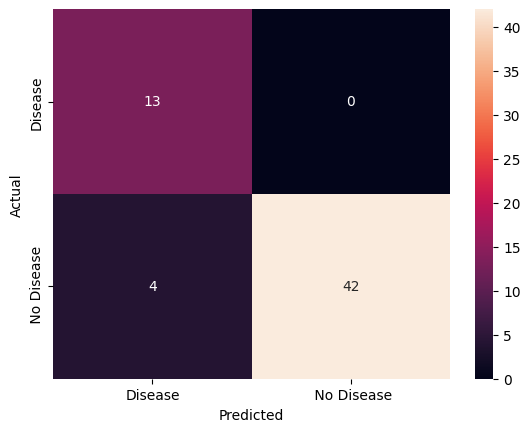

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
labels=['Disease', ' No Disease']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [93]:
# from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
# from sklearn.metrics import roc_auc_score
# from sklearn.preprocessing import label_binarize
# # Get the predicted probabilities for the test set
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic - Decision Tree')
# plt.legend(loc="lower right")
# plt.show()

# k fold cross validation 

In [94]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import datasets
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
score1 = cross_val_score(DecisionTreeClassifier(random_state = 234) , X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score1.round(4)*100}')
print(f'Average score: {"{:.2f}".format(score1.mean()*100)}',"%")

Fold:1, Train set: 156, Test set:39
Fold:2, Train set: 156, Test set:39
Fold:3, Train set: 156, Test set:39
Fold:4, Train set: 156, Test set:39
Fold:5, Train set: 156, Test set:39
Scores for each fold are: [92.31 84.62 89.74 84.62 92.31]
Average score: 88.72 %


In [95]:
# Save the trained model to a file
import joblib
model_filename = 'decison_tree_model.pkl'
joblib.dump(DT_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to decison_tree_model.pkl


# Standard scaller

In [96]:
X=(df_parkinson.iloc[:,1:]).drop(columns=["status"])
y = df_parkinson.status
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)

In [97]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9491525423728814


## Random Forest

In [98]:
# Initialize the random forest classifier
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred_test = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)

gt_array = [y_train, y_test] # ground truth
pred_array = [y_pred_train, y_pred_test] # predictions
print('Model accuracy score : {:0.2%}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score : 96.61%


In [99]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
kf =KFold(n_splits=5, shuffle=True, random_state=42)
cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
score1 = cross_val_score(RandomForestClassifier() , X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score1.round(4)*100}')
print(f'Average score: {"{:.2f}".format(score1.mean()*100)}',"%")

Fold:1, Train set: 156, Test set:39
Fold:2, Train set: 156, Test set:39
Fold:3, Train set: 156, Test set:39
Fold:4, Train set: 156, Test set:39
Fold:5, Train set: 156, Test set:39
Scores for each fold are: [94.87 94.87 92.31 89.74 84.62]
Average score: 91.28 %


In [102]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

# Initialize and train the decision tree model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy*100)

Accuracy: 94.91525423728814
